### Snapchat Filter

In [637]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn')

#### Loading the data

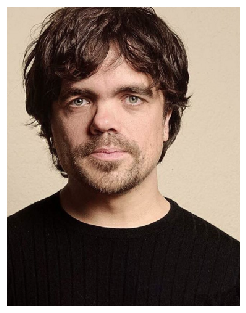

In [638]:
mustache = cv2.imread("Train/mustache.png",-1)
glasses = cv2.imread("Train/glasses.png",-1)
img = cv2.imread("Test/Before.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
plt.show()

#### Loading the Eyes & Nose Cascades

In [639]:
eye_cascade = cv2.CascadeClassifier('Train/third-party/frontalEyes35x16.xml')
nose_cascade = cv2.CascadeClassifier('Train/third-party/Nose18x15.xml')

#### Overlaying the Glasses & Mustache

In [640]:
eyes = eye_cascade.detectMultiScale(img,1.1,5)
nose = nose_cascade.detectMultiScale(img,1.1,5)

In [641]:
for (x,y,w,h) in eyes:
    x1 = x
    y1 = y-15
    x2 = x+h
    y2 = y+w+w//4
    glasses = cv2.resize(glasses,(x2-x1,y2-y1))
    alpha_mask = glasses[:,:,3]/255.0
    alpha_inv = 1.0 - alpha_mask
    for c in range(3):
        img[y1:y2,x1:x2,c] = alpha_mask * glasses[:,:,c] + alpha_inv * img[y1:y2,x1:x2,c]
    
for (x,y,w,h) in nose:
    x1 = x-w//4
    y1 = y+h//3+w//7
    x2 = x+h+h//2
    y2 = y+w+h//2
    mustache = cv2.resize(mustache,(x2-x1,y2-y1))
    alpha_mask = mustache[:,:,3]/255.0
    alpha_inv = 1.0 - alpha_mask
    for c in range(3):
        img[y1:y2,x1:x2,c] = alpha_mask * mustache[:,:,c] + alpha_inv * img[y1:y2,x1:x2,c]

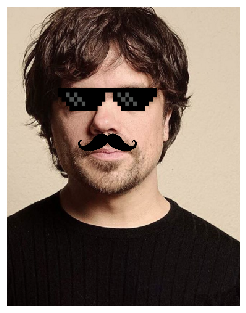

In [642]:
plt.axis("off")
plt.imshow(img)
plt.show()

In [643]:
plt.imsave('out.png',img)

#### Saving the Image in CSV

In [644]:
img = np.array(img,dtype='float32')/255.0
img = img.reshape((-1,3))
df = pd.DataFrame(img, columns=["Channel 1","Channel 2", "Channel 3"])
df.to_csv("output.csv", index=False)